**Problem 1: Sentiment Analysis**

In [10]:
from sentiment_analysis import *
from util import load_dataset, get_country_dict
import time

In [12]:
country_codes = ["AE", "CN", "NZ", "TH", "US"]
country_dict = get_country_dict(load_dataset())

# 1. Load 5 articles of each country

In our project, we used the following 5 countries:
- AE : United Arab Emirates
- CN : China
- NZ : New Zealand
- TH : Thailand
- US : United States

In the following section, 
- 5 articles collected for each country will be loaded into a variable called `word_list`.
- All the 5 different `word_list` from different countries will be combined into a variable called `article_info`

The structure of `article_info`:
```python
`article_info` = { 
        "AE": {"word_list": [...], "word_count": int}, 
        "CN": {"word_list": [...], "word_count": int}, 
        "NZ": {"word_list": [...], "word_count": int}, 
        "TH": {"word_list": [...], "word_count": int}, 
        "US": {"word_list": [...], "word_count": int}, 
}
```

In [14]:
# Get all the important information about articles of each country
article_info = {}
for country_code in country_codes:
    word_list, word_count = article(country_code)
    article_info[country_code] = {"word_list": word_list, "word_count": word_count}

In [15]:
# Combine all the article information into a dataframe
dataFrame = pd.DataFrame({"Country Code": country_codes,
                          "Country": [country_dict[code]["name"] for code in country_codes],
                          "Total word count": [article_info[code]["word_count"] for code in country_codes],
                          "Number of stopwords": [article_info[code]["word_count"] - len(article_info[code]["word_list"]) for code in country_codes], 
                          "Filtered word count": [len(article_info[code]["word_list"]) for code in country_codes]})
dataFrame

,Country Code,Country,Total word count,Number of stopwords,Filtered word count
0,AE,United Arab Emirates,13624,12163,1461
1,CN,China,15365,13585,1780
2,NZ,New Zealand,19086,17047,2039
3,TH,Thailand,23855,21355,2500
4,US,United States,26220,23416,2804


In [16]:
# Plot the frequencies of "number of stopwords" & "number of filtered words" of each country
# "number of stopwords" & "number of filtered words" sum up to "total word count"
fig = px.bar(dataFrame, x='Country', y=['Filtered word count', 'Number of stopwords'], title='Word count')
fig.show()

Articles of United Arab Emirates
First 10 filtered words 	: ['dubai', 'chamber', 'digital', 'economy', 'equiti', 'group', 'discuss', 'ways', 'boost', 'digital']
Total word count 		: 13624


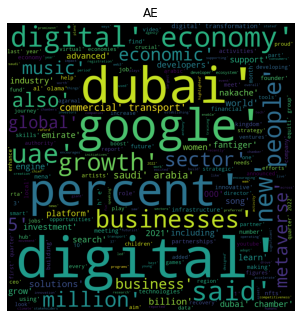


Articles of China
First 10 filtered words 	: ['alibaba', 'kuaishou', 'pace', 'hong', 'kong', 'stock', 'losses', 'tech', 'earnings', 'outlook']
Total word count 		: 15365


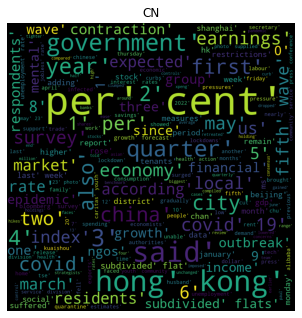


Articles of New Zealand
First 10 filtered words 	: ['covid', 'crime', 'swells', 'new', 'zealand', 'empty', 'city', 'centres', 'early', 'evening']
Total word count 		: 19086


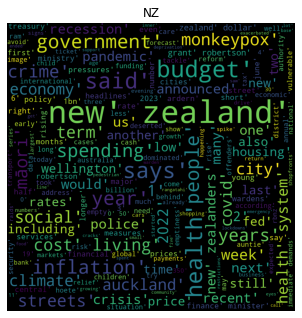


Articles of Thailand
First 10 filtered words 	: ['poverty', 'rising', 'pandemic', '15', 'million', 'expected', 'welfare', '2022', 'thailand', 'poverty']
Total word count 		: 23855


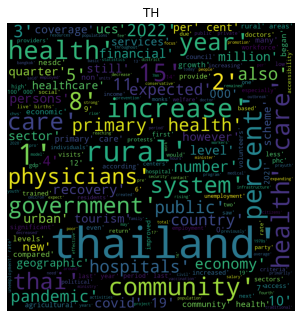


Articles of United States
First 10 filtered words 	: ['biden', 'admits', 'us', 'economy', 'problems', 'warns', 'haul', 'relief', 'president', 'biden']
Total word count 		: 26220


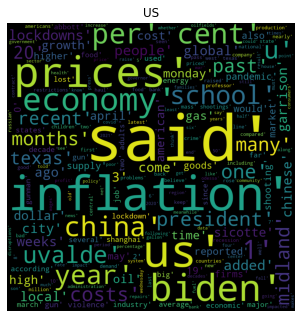

In [17]:
# Display some of them
for country_code in article_info:
    print(f"Articles of {country_dict[country_code]['name']}")
    print(f"{'=' * 30}")
    print(f'First 10 filtered words \t: {article_info[country_code]["word_list"][:10]}')
    print(f'Total word count \t\t: {article_info[country_code]["word_count"]}')
    display_wordcloud(article_info[country_code]["word_list"], country_code)
    print()

# 2. Sentiment Analysis

## 2.1 Sentiment analysis algorithm implemented by us

Sentiment Analysis on AE took 0.13 s


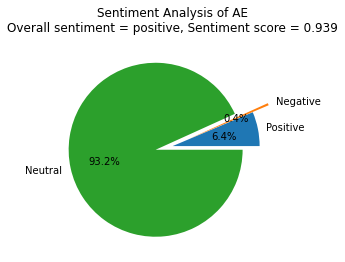


Sentiment Analysis on CN took 0.11 s


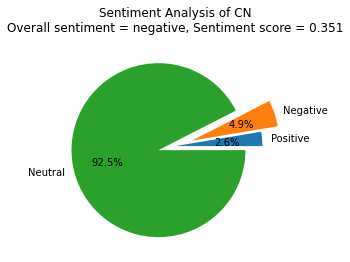


Sentiment Analysis on NZ took 0.11 s


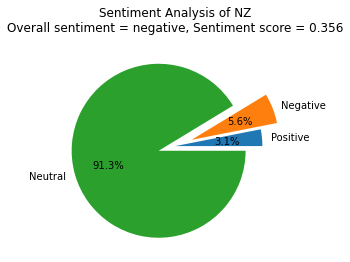


Sentiment Analysis on TH took 0.11 s


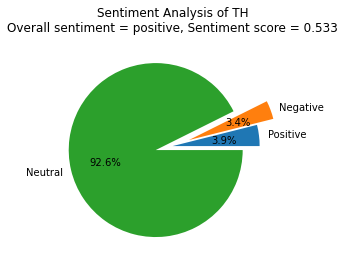


Sentiment Analysis on US took 0.03 s


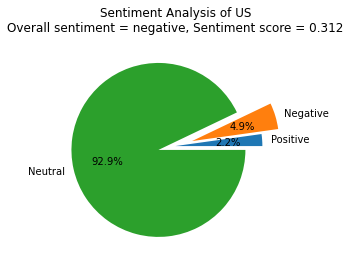

In [18]:
# Using 'freq' method, implemented by ourselves
# Perform sentiment analysis of each country using the filtered word list generated earlier
freq_sentiment_info = {}
for country_code in country_codes:
    start_t = time.time()
    print(f"Sentiment Analysis on {country_code}", end="")
    
    freq_sentiment_info[country_code] = compute_sentiment(word_list=article_info[country_code]["word_list"], country_code=country_code)
    
    end_t = time.time()
    print(f" took {round(end_t - start_t, 2)} s")
    
    display_pie_chart(pos_per=freq_sentiment_info[country_code]["pos_per"], 
                      neg_per=freq_sentiment_info[country_code]["neg_per"],  
                      neu_per=freq_sentiment_info[country_code]["neu_per"], 
                      overall_sent=freq_sentiment_info[country_code]["overall"],
                      sent_score=freq_sentiment_info[country_code]["score"],
                      country_code=country_code)
    print()

## 2.2 Sentiment analysis algorithm by VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

Sentiment Analysis on AE took 0.02 s


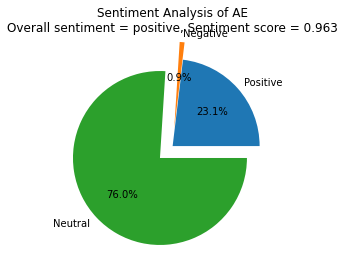


Sentiment Analysis on CN took 0.03 s


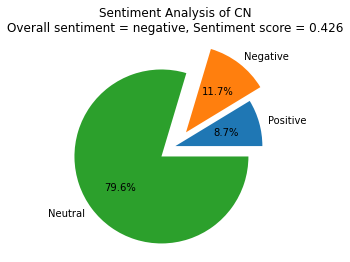


Sentiment Analysis on NZ took 0.04 s


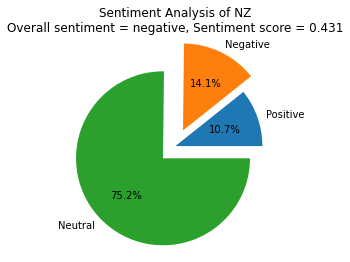


Sentiment Analysis on TH took 0.04 s


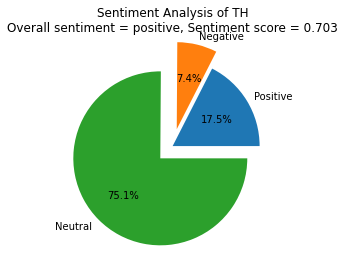


Sentiment Analysis on US took 0.05 s


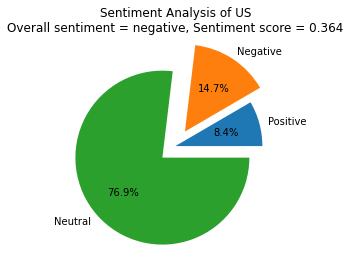

In [19]:
# Using 'vader' method, https://github.com/cjhutto/vaderSentiment
# Perform sentiment analysis of each country using the filtered word list generated earlier
vader_sentiment_info = {}
for country_code in country_codes:
    start_t = time.time()
    print(f"Sentiment Analysis on {country_code}", end="")
    
    vader_sentiment_info[country_code] = sentiment_scores_vader(word_list=article_info[country_code]["word_list"], 
                                                     country_code=country_code)
    
    end_t = time.time()
    print(f" took {round(end_t - start_t, 2)} s")
    
    display_pie_chart(pos_per=vader_sentiment_info[country_code]["pos_per"], 
                      neg_per=vader_sentiment_info[country_code]["neg_per"],  
                      neu_per=vader_sentiment_info[country_code]["neu_per"], 
                      overall_sent=vader_sentiment_info[country_code]["overall"],
                      sent_score=vader_sentiment_info[country_code]["score"],
                      country_code=country_code)
    print()

# 3. Comparison between our algorithm & VADER's algorithm

**Ours is not that bad!**

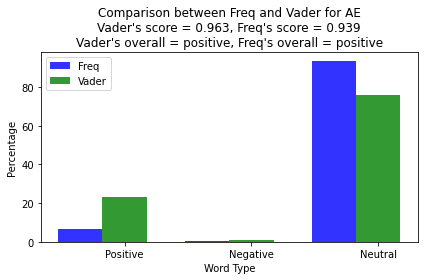

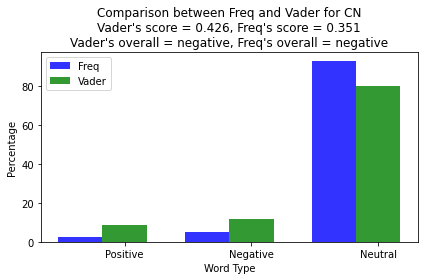

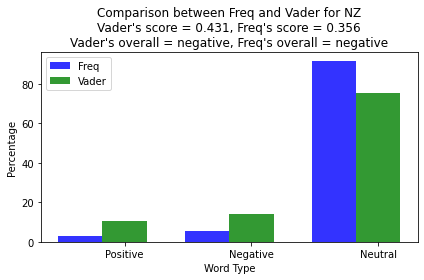

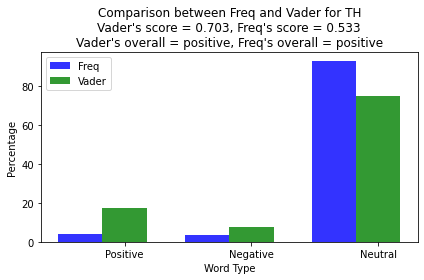

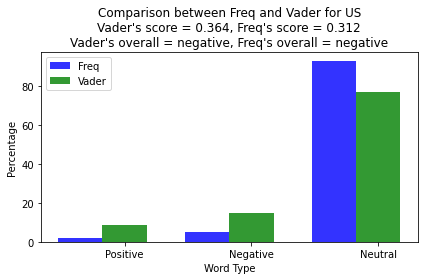

In [20]:
for country_code in country_codes:
    plot_freq_vader_comparison(freq_sentiment_info[country_code], vader_sentiment_info[country_code], country_code)